In [1]:
# configuring path of kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/\
!chmod 600 ~/.kaggle/kaggle.json

cp: target '/root/.kaggle/kaggle.json' is not a directory


In [57]:
# API to fetch dataset from Kaggle
!kaggle datasets download -d omkargaurav/face-mask-dataset

403 - Forbidden - Permission 'datasets.get' was denied


In [3]:
# extracting dataset
from zipfile import ZipFile
dataset = '/content/archive.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [4]:
!ls

archive.zip  data  drive  kaggle.json  sample_data


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from PIL import Image

In [6]:
with_mask_file= os.listdir('/content/data/with_mask')
without_mask_file = os.listdir('/content/data/without_mask')

In [7]:
print(with_mask_file[:10])
print(without_mask_file[:10])

['with_mask_1680.jpg', 'with_mask_3571.jpg', 'with_mask_1461.jpg', 'with_mask_3686.jpg', 'with_mask_103.jpg', 'with_mask_436.jpg', 'with_mask_359.jpg', 'with_mask_1192.jpg', 'with_mask_2664.jpg', 'with_mask_1220.jpg']
['without_mask_1820.jpg', 'without_mask_805.jpg', 'without_mask_1372.jpg', 'without_mask_1626.jpg', 'without_mask_149.jpg', 'without_mask_2767.jpg', 'without_mask_1327.jpg', 'without_mask_731.jpg', 'without_mask_3117.jpg', 'without_mask_3747.jpg']


In [8]:
print(len(with_mask_file))
print(len(without_mask_file))

3725
3828


In [9]:
# Creating labels for both
with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [10]:
print(with_mask_labels[:10])
print(without_mask_labels[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [11]:
# Combining both
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


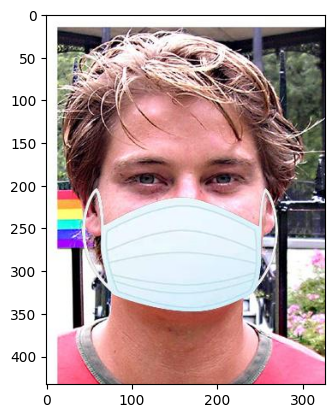

In [12]:
# Displaying with mask images
img = mpimg.imread('/content/data/with_mask/with_mask_1680.jpg')
imgplot = plt.imshow(img)

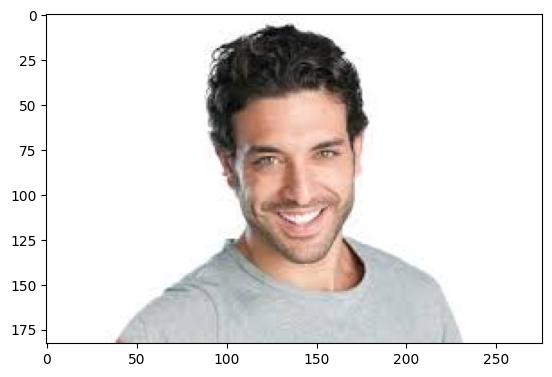

In [13]:
# Displaying without mask images
img = mpimg.imread('/content/data/without_mask/without_mask_1000.jpg')
imgplot = plt.imshow(img)

In [14]:
# Image processing - Resizing and Converting images to numpy arrays

# converting to numpy array
with_mask_path = '/content/data/with_mask/'
without_mask_path = '/content/data/without_mask/'

data = [] # contains path of all images
for img_file in with_mask_file:
  image = Image.open(with_mask_path + img_file) # content/data/with_mask/with_mask_1000.jpg it will concatenate to form a string like this (using PIL library)
  image = image.resize((128,128))
  image = image.convert('RGB') # some files are black and white so converting them into rgb
  image = np.array(image) # converting it to numpy array
  data.append(image)

for img_file in without_mask_file:
  image = Image.open(without_mask_path + img_file) # content/data/without_mask/with_mask_1000.jpg it will concatenate to form a string like this (using PIL library)
  image = image.resize((128,128))
  image = image.convert('RGB') # some files are black and white so converting them into rgb
  image = np.array(image) # converting it to numpy array
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
print(len(data))
print(type(data))
print(data[0].shape)
print(data[0])

7553
<class 'list'>
(128, 128, 3)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [254 254 254]
  [254 254 254]
  [255 255 255]]

 ...

 [[255 254 255]
  [252 255 254]
  [255 254 255]
  ...
  [253 148 195]
  [252 147 195]
  [252 148 195]]

 [[255 254 255]
  [252 255 254]
  [255 254 255]
  ...
  [253 142 191]
  [252 142 191]
  [254 147 196]]

 [[255 254 255]
  [253 255 254]
  [255 254 255]
  ...
  [253 139 189]
  [254 143 193]
  [255 146 195]]]


In [30]:
X  = np.array(data) # this is a list getting converted to numpy array
Y = np.array(labels) # this is a list getting converted to numpy array

In [31]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [32]:
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [33]:
# Splitting data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [34]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [35]:
# Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [36]:
X_train[0]
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [38]:
# Building the convolutional neural network
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - accuracy: 0.7076 - loss: 0.5795 - val_accuracy: 0.8893 - val_loss: 0.2597
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.8833 - loss: 0.2909 - val_accuracy: 0.8926 - val_loss: 0.2434
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9133 - loss: 0.2209 - val_accuracy: 0.8992 - val_loss: 0.2101
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9227 - loss: 0.2001 - val_accuracy: 0.9207 - val_loss: 0.2073
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9324 - loss: 0.1741 - val_accuracy: 0.9223 - val_loss: 0.2112


In [41]:
loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)
print('Test Loss =', loss)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9213 - loss: 0.2343
Test Accuracy = 0.9192587733268738
Test Loss = 0.23751142621040344


<function matplotlib.pyplot.show(close=None, block=None)>

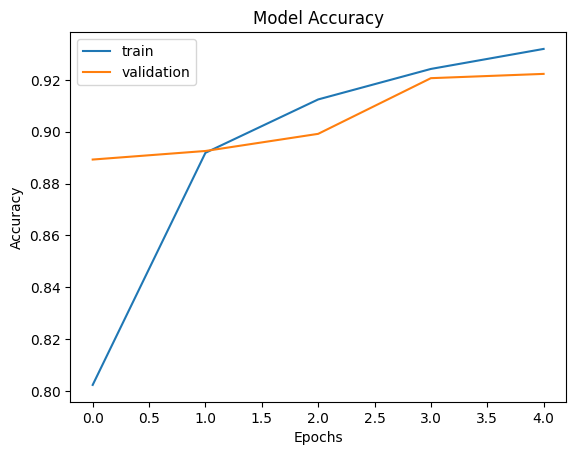

In [42]:
# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

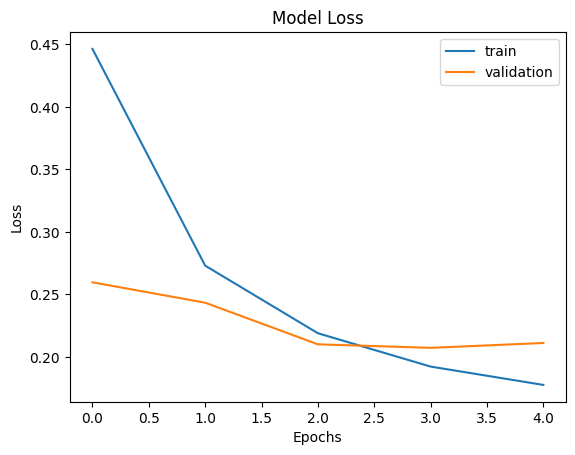

In [43]:
# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show

Enter the path of the image to be tested: /content/with_mask_1250.jpg


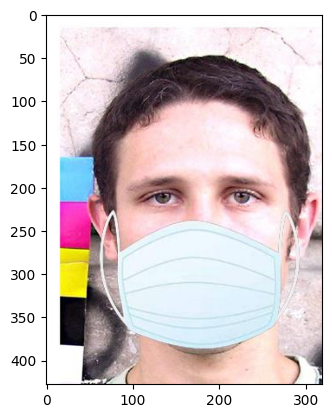

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[0.06001238 0.9475862 ]]
1
The person in the image is wearing a mask


In [56]:
# Maikng a predictive system
input_image_path = input('Enter the path of the image to be tested: ')
input_image = cv2.imread(input_image_path)
input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
plt.imshow(input_image)
plt.show()
input_image_resize = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resize/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped) # for 1 value
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')